In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv(r"E:\ML_project_2\adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Removing unnecessary spaces from the string
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df.head ()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df[df=='?'].count()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [5]:
df.replace('?',np.nan, inplace=True)

In [6]:
# Checking null values
a=df.isna().sum()
print(f"Length of a : {len(a)}")
a

Length of a : 15


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [7]:
# Checking the missing values
mc = []
for i in range(15):
    if a[i]>0:
        mc.append(df.columns[i])
        
mc

['workclass', 'occupation', 'country']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Here we can observe that the missing values are present only in the categorical columns.

In [9]:
# !pip install sklearn-pandas
# !pip install feature-engine

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [10]:
df['workclass']= imputer.fit_transform(df[['workclass']])
df['occupation']= imputer.fit_transform(df[['occupation']])
df['country']= imputer.fit_transform(df[['country']])

In [11]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [12]:
df.drop(columns=['education'], inplace=True)

In [14]:
# Extracting the categorical columns
cat_df = df.select_dtypes(include=['object']).copy()

In [15]:
cat_df.columns

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'country', 'salary'],
      dtype='object')

In [16]:
cat_df.head()

,workclass,marital-status,occupation,relationship,race,sex,country,salary
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [17]:
cat_df['salary'].unique()

array(['<=50K', '>50K'], dtype=object)

In [18]:
cat_df['salary'] = cat_df['salary'].map({'<=50K': 0, '>50K': 1})

In [19]:
for feature in cat_df.drop('salary', axis=1).columns:
    x = cat_df[feature].head(1)
    cat_df = pd.get_dummies(cat_df, columns=[feature], prefix=feature, drop_first=True)

In [20]:
cat_df.head()

,salary,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Extracting Numerical columns

In [21]:
num_df = df.select_dtypes(include=['int64', 'float64']).copy()

In [22]:
num_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
scaled_data = scaler.fit_transform(num_df)

In [25]:
scaled_num_df= pd.DataFrame(data=scaled_data, columns=num_df.columns)

In [26]:
scaled_num_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


## Combining the numerical and categorical columns to get the final dataset

In [27]:
final_df = pd.concat([scaled_num_df,cat_df], axis=1)

In [28]:
final_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Vietnam,country_Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X = final_df.drop('salary', axis=1)
y = final_df['salary']

(array([24720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7841.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

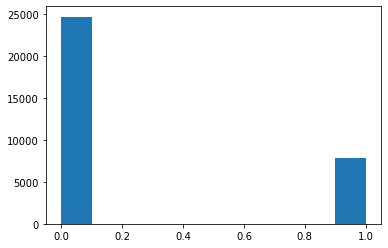

In [30]:
plt.hist(y, bins=10)

### Here, we observed that the people with less than 50k salary are more in number than the people with salary greater than 50k.
## It shows that tha dataset is imbalanced.

In [31]:
rdsample = RandomOverSampler(random_state=0)
X_sampled, y_sampled = rdsample.fit_resample(X, y)

(array([24720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 24720.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

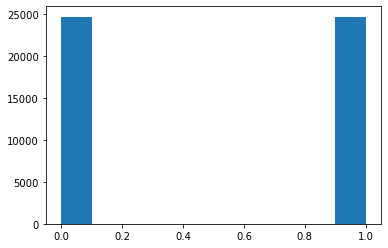

In [32]:
plt.hist(y_sampled, bins=10)

### Now the data looks balanced.

In [33]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=322)

In [83]:
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# from sklearn.svm import SVC
# svc = SVC()
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier()
# from sklearn.neighbors import KNeighborsClassifier
# knnc = KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(var_smoothing=0.05)
# from sklearn.tree import DecisionTreeClassifier
# dtc = DecisionTreeClassifier()
# from sklearn.ensemble import AdaBoostClassifier
# abc = AdaBoostClassifier()
# from sklearn.ensemble import GradientBoostingClassifier
# gbc = GradientBoostingClassifier()

from xgboost import XGBClassifier
xgb = XGBClassifier()


In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV

In [85]:
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
y_pred_xgb = xgb.fit(X_train, y_train).predict(X_test)

In [86]:
y_train_pred_gnb = gnb.predict(X_train) 
train_acc_gnb = round((gnb.score(X_train, y_train))*100, 2)
y_train_pred_xgb = xgb.predict(X_train)
train_acc_xgb = round((xgb.score(X_train, y_train))*100, 2)
print(f"Train Accuracy of GNB: {train_acc_gnb}")
print(f"Train Accuracy of XGB: {train_acc_xgb}")

gnb_acc = round((accuracy_score(y_test, y_pred_gnb))*100, 2)
xgb_acc = round((accuracy_score(y_test, y_pred_xgb))*100, 2)
print(f"Test Accuracy of GNB: {gnb_acc}")
print(f"Test Accuracy of XGB: {xgb_acc}")

Train Accuracy of GNB: 81.08
Train Accuracy of XGB: 89.27
Test Accuracy of GNB: 80.5
Test Accuracy of XGB: 86.59


In [87]:
accuracy = pd.DataFrame(data=[[train_acc_gnb,train_acc_xgb],[gnb_acc, xgb_acc]], columns=['GNB', 'XGB'], index=['Train', 'Test'])
accuracy

,GNB,XGB
Train,81.08,89.27
Test,80.50,86.59


## Hyperparameter tuning using GridSearchCV

In [88]:
param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}
grid = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, verbose=1)

In [89]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=GaussianNB(var_smoothing=0.05),
             param_grid={'var_smoothing': [1e-09, 0.1, 0.001, 0.5, 0.05, 0.01,
                                           1e-08, 1e-07, 1e-06, 1e-10, 1e-11]},
             verbose=1)

In [90]:
grid.best_params_

{'var_smoothing': 0.05}

In [91]:
grid.best_estimator_

GaussianNB(var_smoothing=0.05)

In [95]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}


In [97]:
from sklearn.model_selection import StratifiedKFold

In [102]:
clf = GridSearchCV(xgb, parameters, n_jobs=5, 
                   cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

In [135]:
y_pred_xgb_gs=clf.fit(X_train, y_train).predict(X_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[12:07:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [132]:
clf.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 11,
 'missing': -999,
 'n_estimators': 5,
 'nthread': 4,
 'objective': 'binary:logistic',
 'seed': 1337,
 'silent': 1,
 'subsample': 0.8}

In [133]:
y_pred_xgb_hpt = clf.best_score_

In [134]:
print(clf.best_estimator_, '\n\nBest score : ', y_pred_xgb_hpt, '\n\nBest parameters : ', clf.best_params_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=11,
              missing=-999, monotone_constraints='()', n_estimators=5, n_jobs=0,
              nthread=4, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...) 

Best score :  0.909209346889207 

Best parameters :  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}


In [116]:
best_parameters = max(clf.cv_results_, key= lambda x:x[1])
score = max(clf.cv_results_, key= lambda x:x[1])

In [117]:
score

'std_fit_time'

In [118]:
best_parameters

'std_fit_time'

In [137]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      4877
           1       0.84      0.91      0.87      5011

    accuracy                           0.87      9888
   macro avg       0.87      0.87      0.87      9888
weighted avg       0.87      0.87      0.87      9888



In [8]:
df.to_csv(r"E:\ML_project_2\adult_census_income_prediction\demo7.csv", index=False)